<a href="https://colab.research.google.com/github/mcdanielU/Data-Wrangling-/blob/master/ECE657A_Assignment2_Covid_19_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score, plot_confusion_matrix


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/ECE657Assignment/covid_train.csv')

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/ECE657Assignment/covid_tests.csv')

In [ ]:
df_train.head()

,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1
0,50s,MALE,NO KNOWN EPI LINK,Oakville,NaN,43.413997,-79.744796,Resolved
1,20s,FEMALE,CC,Guelph,NaN,43.524881,-80.233743,Not Resolved
2,90s,FEMALE,OB,Barrie,Yes,44.410713,-79.686306,Resolved
3,20s,FEMALE,MISSING INFORMATION,Toronto,NaN,43.656591,-79.379358,Resolved
4,90s,FEMALE,OB,Ottawa,Yes,45.345665,-75.763912,Fatal


In [ ]:
df_test.head()

,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,80s,FEMALE,MISSING INFORMATION,Toronto,NaN,43.656591,-79.379358
1,80s,MALE,NO KNOWN EPI LINK,Toronto,Yes,43.656591,-79.379358
2,40s,FEMALE,OB,Stratford,Yes,43.368662,-81.001913
3,30s,MALE,NO KNOWN EPI LINK,Mississauga,NaN,43.647471,-79.708893
4,60s,MALE,NO KNOWN EPI LINK,London,NaN,42.981468,-81.254016


In [ ]:
# import seaborn as sns

# sns.pairplot(df, hue='Outcome1')

# DATA EXPLORATION ANALYSIS 

In [ ]:
df_train.isnull().sum()

Age_Group                     6
Client_Gender                 0
Case_AcquisitionInfo          0
Reporting_PHU_City            0
Outbreak_Related           9020
Reporting_PHU_Latitude        0
Reporting_PHU_Longitude       0
Outcome1                      0
dtype: int64

In [ ]:
df_test.isnull().sum()

Age_Group                     0
Client_Gender                 0
Case_AcquisitionInfo          0
Reporting_PHU_City            0
Outbreak_Related           2288
Reporting_PHU_Latitude        0
Reporting_PHU_Longitude       0
dtype: int64

In [ ]:
#FIll empty data with NO in outbreak related 

In [ ]:
df_train['Outbreak_Related'].fillna('No', inplace=True)

In [ ]:
df_test['Outbreak_Related'].fillna('No', inplace=True)

In [ ]:
df_train.isnull().sum()

Age_Group                  6
Client_Gender              0
Case_AcquisitionInfo       0
Reporting_PHU_City         0
Outbreak_Related           0
Reporting_PHU_Latitude     0
Reporting_PHU_Longitude    0
Outcome1                   0
dtype: int64

In [ ]:
df_test.isnull().sum()

Age_Group                  0
Client_Gender              0
Case_AcquisitionInfo       0
Reporting_PHU_City         0
Outbreak_Related           0
Reporting_PHU_Latitude     0
Reporting_PHU_Longitude    0
dtype: int64

In [ ]:
df_train.dtypes

Age_Group                   object
Client_Gender               object
Case_AcquisitionInfo        object
Reporting_PHU_City          object
Outbreak_Related            object
Reporting_PHU_Latitude     float64
Reporting_PHU_Longitude    float64
Outcome1                    object
dtype: object

In [ ]:
df_test.dtypes

Age_Group                   object
Client_Gender               object
Case_AcquisitionInfo        object
Reporting_PHU_City          object
Outbreak_Related            object
Reporting_PHU_Latitude     float64
Reporting_PHU_Longitude    float64
dtype: object

In [ ]:
df_train['Age_Group'].unique()

array([50, 20, 90, 60, 70, 30, 80, 19, 40])

In [ ]:
df_test['Age_Group'].unique()

array(['80s', '40s', '30s', '60s', '90s', '20s', '50s', '<20', '70s'],
      dtype=object)

In [ ]:
#Find mode of Age group to replace the missing values 
df_train['Age_Group'].mode()

0    80s
dtype: object

In [ ]:
 df_test['Age_Group'].mode()

0    80s
dtype: object

In [ ]:
#FIll NAN with 80s 
df_train['Age_Group'].fillna('80s', inplace=True)

In [ ]:
df_train.isnull().sum()

Age_Group                  0
Client_Gender              0
Case_AcquisitionInfo       0
Reporting_PHU_City         0
Outbreak_Related           0
Reporting_PHU_Latitude     0
Reporting_PHU_Longitude    0
Outcome1                   0
dtype: int64

In [ ]:
df_test.isnull().sum()

Age_Group                  0
Client_Gender              0
Case_AcquisitionInfo       0
Reporting_PHU_City         0
Outbreak_Related           0
Reporting_PHU_Latitude     0
Reporting_PHU_Longitude    0
dtype: int64

In [ ]:
 df_train['Age_Group'] = df_train['Age_Group'].replace(['<20'],'19')

In [ ]:
 df_test['Age_Group'] = df_test['Age_Group'].replace(['<20'],'19')

In [ ]:
df_train['Age_Group'] = df_train['Age_Group'].map(lambda x: x.rstrip('s'))

In [ ]:
df_train.head()

,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1
0,50,MALE,NO KNOWN EPI LINK,Oakville,No,43.413997,-79.744796,Resolved
1,20,FEMALE,CC,Guelph,No,43.524881,-80.233743,Not Resolved
2,90,FEMALE,OB,Barrie,Yes,44.410713,-79.686306,Resolved
3,20,FEMALE,MISSING INFORMATION,Toronto,No,43.656591,-79.379358,Resolved
4,90,FEMALE,OB,Ottawa,Yes,45.345665,-75.763912,Fatal


In [ ]:
df_test['Age_Group'] = df_test['Age_Group'].map(lambda x: x.rstrip('s'))

In [ ]:
df_test.head()

,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,80,FEMALE,MISSING INFORMATION,Toronto,No,43.656591,-79.379358
1,80,MALE,NO KNOWN EPI LINK,Toronto,Yes,43.656591,-79.379358
2,40,FEMALE,OB,Stratford,Yes,43.368662,-81.001913
3,30,MALE,NO KNOWN EPI LINK,Mississauga,No,43.647471,-79.708893
4,60,MALE,NO KNOWN EPI LINK,London,No,42.981468,-81.254016


In [ ]:
df_train = df_train[df_train['Age_Group'] != 'missing']
df_train['Age_Group'] = df_train['Age_Group'].astype('int')

In [ ]:
df_test = df_test[df_test['Age_Group'] != 'missing']
df_test['Age_Group'] = df_test['Age_Group'].astype('int')

In [ ]:
df_train.info

<bound method DataFrame.info of        Age_Group Client_Gender  ... Reporting_PHU_Longitude      Outcome1
0             50          MALE  ...              -79.744796      Resolved
1             20        FEMALE  ...              -80.233743  Not Resolved
2             90        FEMALE  ...              -79.686306      Resolved
3             20        FEMALE  ...              -79.379358      Resolved
4             90        FEMALE  ...              -75.763912         Fatal
...          ...           ...  ...                     ...           ...
14846         19        FEMALE  ...              -79.871341  Not Resolved
14847         20        FEMALE  ...              -79.708893  Not Resolved
14848         80          MALE  ...              -79.241220         Fatal
14849         50        FEMALE  ...              -79.480239         Fatal
14850         90        FEMALE  ...              -79.379358         Fatal

[14851 rows x 8 columns]>

In [ ]:
#Checking for unique values in Client Gender 
df_train['Client_Gender'].unique()

array(['MALE', 'FEMALE', 'UNSPECIFIED', 'GENDER DIVERSE'], dtype=object)

In [ ]:
df_test['Client_Gender'].unique()

array(['FEMALE', 'MALE', 'UNSPECIFIED'], dtype=object)

In [ ]:
#Drop some features in Gender to reduce Unbalaced data
G_diverse_rows = df_train[df_train['Client_Gender'] == 'GENDER DIVERSE' ].index


In [ ]:
df_train.drop(G_diverse_rows , inplace=True)

In [ ]:
#Checking for unique values in Client Gender 
df_train['Client_Gender'].unique()

array([1, 0, 'UNSPECIFIED'], dtype=object)

In [ ]:
df_test['Client_Gender'].unique()

array(['FEMALE', 'MALE', 'UNSPECIFIED'], dtype=object)

In [ ]:
#Convert Binary values to numerical dataset

In [ ]:
df_train['Outbreak_Related'] = df_train['Outbreak_Related'].replace({'No':0, 'Yes':1})

In [ ]:
df_test['Outbreak_Related'] = df_test['Outbreak_Related'].replace({'No':0, 'Yes':1})

In [ ]:
df_train['Client_Gender'] = df_train['Client_Gender'].replace({'FEMALE':0, 'MALE':1})

In [ ]:
df_test['Client_Gender'] = df_test['Client_Gender'].replace({'FEMALE':0, 'MALE':1})

#SEPERATING DATASET INTO TRAINING DATASET WITH TEST DATASET AND IT'S LABELS

In [ ]:
X = df_train.drop(["Outcome1"], axis=1)
y = df_train["Outcome1"]


In [ ]:
#Using one hot encoding 
X_train_one_hot_encoded = pd.get_dummies(X)

In [ ]:
X_train_one_hot_encoded.head()

,Age_Group,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Client_Gender_0,Client_Gender_1,Client_Gender_UNSPECIFIED,Case_AcquisitionInfo_CC,Case_AcquisitionInfo_MISSING INFORMATION,Case_AcquisitionInfo_NO KNOWN EPI LINK,Case_AcquisitionInfo_OB,Case_AcquisitionInfo_TRAVEL,Case_AcquisitionInfo_UNSPECIFIED EPI LINK,Reporting_PHU_City_Barrie,Reporting_PHU_City_Belleville,Reporting_PHU_City_Brantford,Reporting_PHU_City_Brockville,Reporting_PHU_City_Chatham,Reporting_PHU_City_Cornwall,Reporting_PHU_City_Guelph,Reporting_PHU_City_Hamilton,Reporting_PHU_City_Kenora,Reporting_PHU_City_Kingston,Reporting_PHU_City_London,Reporting_PHU_City_Mississauga,Reporting_PHU_City_New Liskeard,Reporting_PHU_City_Newmarket,Reporting_PHU_City_North Bay,Reporting_PHU_City_Oakville,Reporting_PHU_City_Ottawa,Reporting_PHU_City_Owen Sound,Reporting_PHU_City_Pembroke,Reporting_PHU_City_Peterborough,Reporting_PHU_City_Point Edward,Reporting_PHU_City_Port Hope,Reporting_PHU_City_Sault Ste. Marie,Reporting_PHU_City_Simcoe,Reporting_PHU_City_St. Thomas,Reporting_PHU_City_Stratford,Reporting_PHU_City_Sudbury,Reporting_PHU_City_Thorold,Reporting_PHU_City_Thunder Bay,Reporting_PHU_City_Timmins,Reporting_PHU_City_Toronto,Reporting_PHU_City_Waterloo,Reporting_PHU_City_Whitby,Reporting_PHU_City_Windsor
0,50,0,43.413997,-79.744796,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20,0,43.524881,-80.233743,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,90,1,44.410713,-79.686306,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,20,0,43.656591,-79.379358,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,90,1,45.345665,-75.763912,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Cross validation
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X_train_one_hot_encoded, y, 
                                                    test_size = 0.2,
                                                    random_state = 0)


#DECISION TREE


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf_dt_1 = DecisionTreeClassifier(random_state = 0)
clf_dt_1 = clf_dt_1.fit(X_train , y_train)

In [ ]:
y_predicted = clf_dt_1. predict(X_test)

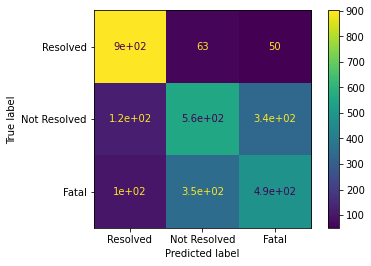

In [ ]:
plot_confusion_matrix(clf_dt_1,
                      X_test,
                      y_test,
                      display_labels=['Resolved','Not Resolved','Fatal'])

In [ ]:
accuracy_score(y_test, y_predicted)

0.6558922558922559

###TUNING THE DECISION TREE 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf_dt_2 = DecisionTreeClassifier(random_state=0)

In [ ]:
para_dist ={
    "max_depth":[3, 5, 10, None]
}

In [ ]:
grid = GridSearchCV(clf_dt_2, param_grid=para_dist, cv=10)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 5, 10, None]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=

In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.02926254, 0.03444092, 0.04429896, 0.05451257]),
 'mean_score_time': array([0.00256691, 0.00262878, 0.00263023, 0.00276618]),
 'mean_test_score': array([0.65342274, 0.65931521, 0.65628519, 0.64668788]),
 'param_max_depth': masked_array(data=[3, 5, 10, None],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 3},
  {'max_depth': 5},
  {'max_depth': 10},
  {'max_depth': None}],
 'rank_test_score': array([3, 1, 2, 4], dtype=int32),
 'split0_test_score': array([0.65488215, 0.65488215, 0.65740741, 0.64225589]),
 'split1_test_score': array([0.67087542, 0.68518519, 0.67508418, 0.66919192]),
 'split2_test_score': array([0.64141414, 0.6456229 , 0.64225589, 0.64646465]),
 'split3_test_score': array([0.63636364, 0.64646465, 0.63804714, 0.62626263]),
 'split4_test_score': array([0.64057239, 0.64393939, 0.63299663, 0.63047138]),
 'split5_test_score': array([0.68097643, 0.68686869, 0.68434343, 0.676

In [ ]:
grid.best_params_

{'max_depth': 5}

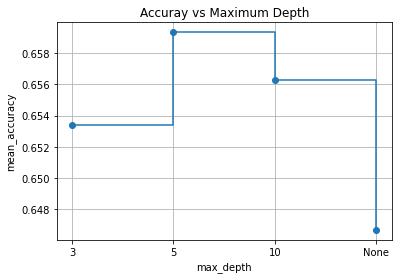

In [ ]:
mean_accuracy = grid.cv_results_['mean_test_score']
max_depth = [3, 5, 10, 'None']
fig, axis = plt.subplots()
axis.set_xlabel("max_depth")
axis.set_ylabel("mean_accuracy")
axis.set_title("Accuray vs Maximum Depth")
axis.plot(max_depth, mean_accuracy, marker ='o' , label="train",drawstyle ="steps-post")
plt.grid()

In [ ]:
clf_dt_2 = DecisionTreeClassifier(random_state=0, max_depth=5)
clf_dt_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_predicted_dt_2 = clf_dt_2. predict(X_test)

In [ ]:
accuracy_score(y_test, y_predicted_dt_2)

0.6592592592592592

###VISUALIZE DECISION TREE 




[Text(909.1551724137931, 489.24, 'Age_Group <= 65.0\ngini = 0.667\nsamples = 11879\nvalue = [3936, 3933, 4010]\nclass = Fatal'),
 Text(461.7931034482759, 380.52000000000004, 'Case_AcquisitionInfo_MISSING INFORMATION <= 0.5\ngini = 0.558\nsamples = 7506\nvalue = [482, 3417, 3607]\nclass = Fatal'),
 Text(230.89655172413794, 271.8, 'Age_Group <= 55.0\ngini = 0.554\nsamples = 5567\nvalue = [418, 2133, 3016]\nclass = Fatal'),
 Text(115.44827586206897, 163.08000000000004, 'Reporting_PHU_Longitude <= -79.424\ngini = 0.514\nsamples = 4706\nvalue = [137, 1888, 2681]\nclass = Fatal'),
 Text(57.724137931034484, 54.360000000000014, '\n  (...)  \n'),
 Text(173.17241379310346, 54.360000000000014, '\n  (...)  \n'),
 Text(346.3448275862069, 163.08000000000004, 'Case_AcquisitionInfo_OB <= 0.5\ngini = 0.661\nsamples = 861\nvalue = [281, 245, 335]\nclass = Fatal'),
 Text(288.62068965517244, 54.360000000000014, '\n  (...)  \n'),
 Text(404.0689655172414, 54.360000000000014, '\n  (...)  \n'),
 Text(692.6896

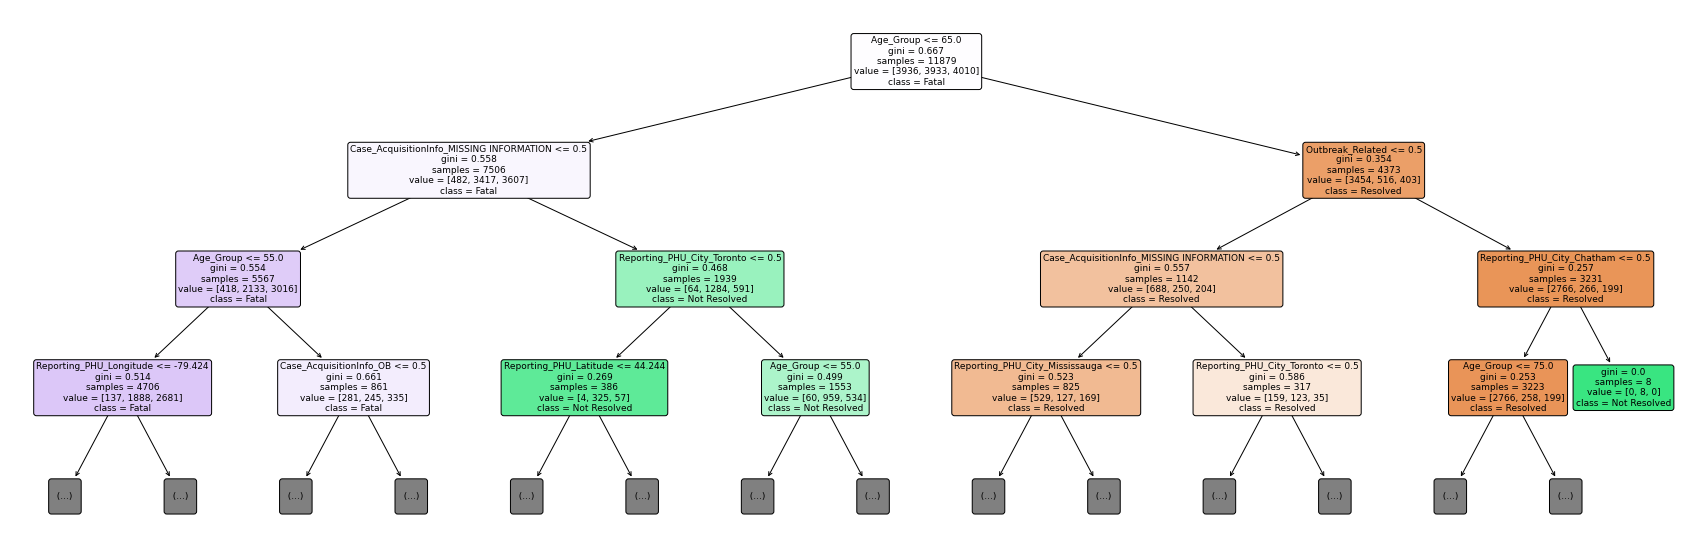

In [116]:
plt.figure(figsize=(30, 10))
tree.plot_tree(clf_dt_2,max_depth=3,
          feature_names = X_train_one_hot_encoded.columns,
          class_names =['Resolved','Not Resolved','Fatal'],
          filled =True,
          rounded = True,
          fontsize=9
          )

#RANDOM FOREST








---



In [117]:
from sklearn.ensemble import RandomForestClassifier 
clf_rand = RandomForestClassifier()
clf_rand.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

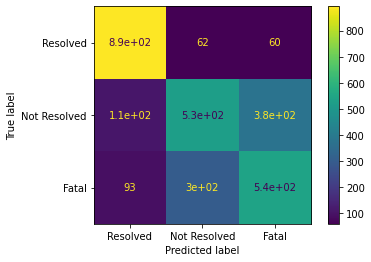

In [118]:
plot_confusion_matrix(clf_rand,
                      X_test,
                      y_test,
                       display_labels=['Resolved','Not Resolved','Fatal'])

In [119]:
y_rand_predicted = clf_rand. predict(X_test)

In [120]:
accuracy_score(y_test, y_rand_predicted)

0.6612794612794612

###TUNING THE RANDOM FOREST 


In [121]:
clf_rand_2 = RandomForestClassifier(random_state=0)

In [122]:
para_rforest ={
    "n_estimators": [5, 10, 50, 150, 200],
    "max_depth":[3, 5, 10, None]
}

In [123]:
grid_rforest = GridSearchCV(clf_rand_2 , param_grid=  para_rforest , cv =10)

In [124]:
grid_rforest.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                  

In [125]:
grid_rforest.cv_results_

{'mean_fit_time': array([0.04981415, 0.05897217, 0.22270658, 0.62949808, 0.82856941,
        0.04218063, 0.06717513, 0.26174335, 0.76003101, 1.00042524,
        0.05311139, 0.08719099, 0.36996987, 1.08538084, 1.4321682 ,
        0.06913218, 0.12239399, 0.55037291, 1.63640604, 2.16003766]),
 'mean_score_time': array([0.00388048, 0.00468524, 0.01166933, 0.0283952 , 0.03689508,
        0.0037801 , 0.00476758, 0.01273546, 0.03167355, 0.04160669,
        0.00446913, 0.00577881, 0.01651168, 0.04222348, 0.05474081,
        0.00485816, 0.00692434, 0.02350132, 0.06246955, 0.08193083]),
 'mean_test_score': array([0.62504943, 0.63826683, 0.62446261, 0.62606208, 0.62799839,
        0.60981402, 0.634649  , 0.6353229 , 0.64281604, 0.64483625,
        0.66099907, 0.66302012, 0.66941764, 0.66908094, 0.66874438,
        0.64744567, 0.64854066, 0.65165492, 0.65131822, 0.65241264]),
 'param_max_depth': masked_array(data=[3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10, None,
                    None, No

In [126]:
mean_accuray_rforest = grid_rforest.cv_results_['mean_test_score']
mean_accuray_rforest

array([0.62504943, 0.63826683, 0.62446261, 0.62606208, 0.62799839,
       0.60981402, 0.634649  , 0.6353229 , 0.64281604, 0.64483625,
       0.66099907, 0.66302012, 0.66941764, 0.66908094, 0.66874438,
       0.64744567, 0.64854066, 0.65165492, 0.65131822, 0.65241264])

In [127]:
index_0=0
index_1=1
index_2=2
index_3=3
index_4=4
arr_1=[]
arr_2=[]
arr_3=[]
arr_4=[]
arr_5=[]

for val in range(4):
  arr_1.append(mean_accuray_rforest[index_0])
  arr_2.append(mean_accuray_rforest[index_1])
  arr_3.append(mean_accuray_rforest[index_2])
  arr_4.append(mean_accuray_rforest[index_3])
  arr_5.append(mean_accuray_rforest[index_4])
  index_0+=5
  index_1+=5
  index_2+=5
  index_3+=5
  index_4+=5



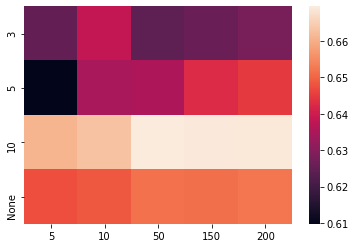

In [128]:
import seaborn as sns
pandas_dataset = pd.DataFrame({'5': arr_1,'10': arr_2 ,'50': arr_3,'150': arr_4,'200': arr_5})
pandas_dataset.index = ['3','5','10','None']
plo = sns.heatmap(pandas_dataset)
plt.show()

In [131]:
grid_rforest.best_params_

{'max_depth': 10, 'n_estimators': 50}

In [132]:
clf_rand_3 = RandomForestClassifier(max_depth=10, n_estimators=50)

In [133]:
clf_rand_3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

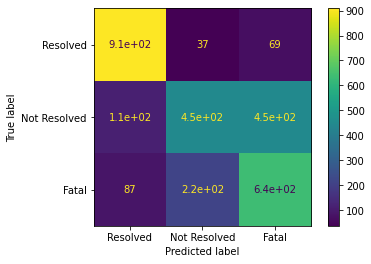

In [134]:
plot_confusion_matrix(clf_rand_3,
                      X_test,
                      y_test,
                      display_labels=['Resolved','Not Resolved','Fatal'])

In [135]:
y_rand_predicted_2 = clf_rand_3. predict(X_test)

In [136]:
accuracy_score(y_test, y_rand_predicted_2)

0.6727272727272727

#GRADIENT TREE BOOSTING

In [139]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gboost = GradientBoostingClassifier(random_state = 0)
clf_gboost.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [141]:
y_gboost_pred = clf_gboost.predict(X_test)

In [142]:
clf_gboost_accuracy = accuracy_score(y_test, y_gboost_pred)
clf_gboost_accuracy

0.6703703703703704

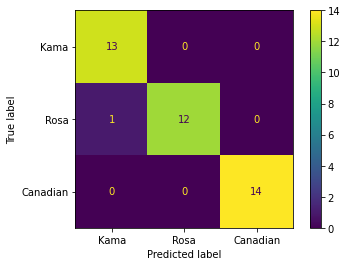

In [ ]:
plot_confusion_matrix(clf_gboost,
                      X_test,
                      y_test,
                      display_labels=['Kama','Rosa','Canadian'])

###TUNING THE GRADIENT BOOST

In [ ]:
clf_gboost_2 = GradientBoostingClassifier(random_state=0)

In [ ]:
    n_estimators = [5, 10, 50, 150, 200]


In [ ]:
para_gboost ={
    "n_estimators":[5, 10, 50, 150, 200]
}

In [ ]:
grid_gboost = GridSearchCV(clf_gboost_2, param_grid=para_gboost, cv=10)

In [ ]:
grid_gboost.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
        

In [ ]:
grid_gboost.cv_results_

{'mean_fit_time': array([0.01966937, 0.03364751, 0.15734262, 0.35317864, 0.42770109]),
 'mean_score_time': array([0.00160997, 0.00181324, 0.00162592, 0.00192859, 0.00203278]),
 'mean_test_score': array([0.91125   , 0.905     , 0.93083333, 0.93708333, 0.93708333]),
 'param_n_estimators': masked_array(data=[5, 10, 50, 150, 200],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 5},
  {'n_estimators': 10},
  {'n_estimators': 50},
  {'n_estimators': 150},
  {'n_estimators': 200}],
 'rank_test_score': array([4, 5, 3, 1, 1], dtype=int32),
 'split0_test_score': array([0.875, 0.875, 0.875, 0.875, 0.875]),
 'split1_test_score': array([0.9375, 0.9375, 1.    , 1.    , 1.    ]),
 'split2_test_score': array([1.    , 0.9375, 0.9375, 1.    , 1.    ]),
 'split3_test_score': array([0.875 , 0.875 , 0.9375, 0.9375, 0.9375]),
 'split4_test_score': array([0.875, 0.875, 0.875, 0.875, 0.875]),
 'split5_test_score': array([

In [ ]:
mean_accuracy_gboost = grid_gboost.cv_results_['mean_test_score']
mean_accuracy_gboost

array([0.91125   , 0.905     , 0.93083333, 0.93708333, 0.93708333])

In [ ]:
grid_gboost.best_params_

{'n_estimators': 150}

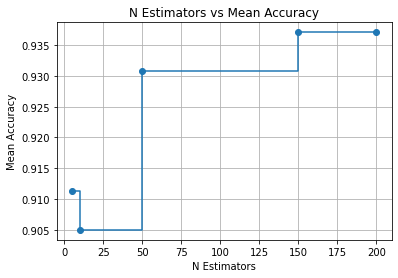

In [ ]:
fig, axis = plt.subplots()
axis.set_xlabel("N Estimators")
axis.set_ylabel("Mean Accuracy")
axis.set_title("N Estimators vs Mean Accuracy")
axis.plot(n_estimators, mean_accuracy_gboost, marker ='o' , label="train",drawstyle ="steps-post")
plt.grid()

In [ ]:
clf_gboost_3 = GradientBoostingClassifier(random_state=0, n_estimators=150)

In [ ]:
clf_gboost_3.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
clf_gboost_prediction = clf_gboost_3.predict(X_test)

In [ ]:
clf_gboost_accuracy_1 = accuracy_score(y_test, clf_gboost_prediction)
clf_gboost_accuracy_1

0.975

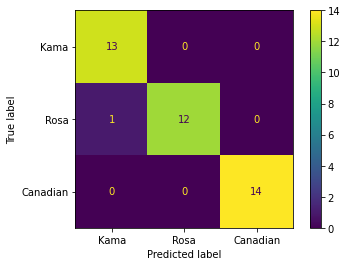

In [ ]:
plot_confusion_matrix(clf_gboost_3,
                      X_test,
                      y_test,
                      display_labels=['Kama','Rosa','Canadian'])

#NAIVE BAYES CLASSIFIER 

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
naive_clf = GaussianNB()
naive_clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

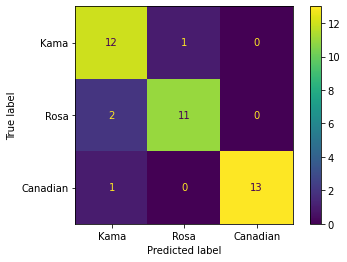

In [ ]:
plot_confusion_matrix(naive_clf,
                      X_test,
                      y_test,
                      display_labels=['Kama','Rosa','Canadian'])

In [ ]:
y_naive_predicted = naive_clf. predict(X_test)

In [ ]:
naiveB_accuracy = accuracy_score(y_test, y_naive_predicted)
naiveB_accuracy

0.9

###TUNING GAUSSIANNB HYPERPARAMETERS

In [ ]:
naive_clf_2 = GaussianNB()


In [ ]:
 var_smoothing = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]

In [ ]:
param_gb = {
    "var_smoothing": [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
    }

In [ ]:
grid_naive_clf = GridSearchCV(naive_clf_2 , param_grid=  param_gb , cv =10)

In [ ]:
grid_naive_clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': [1e-10, 1e-09, 1e-05, 0.001, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid_naive_clf.best_params_

{'var_smoothing': 0.001}

In [ ]:
grid_naive_clf.cv_results_

{'mean_fit_time': array([0.00201604, 0.00162446, 0.00163085, 0.00185282, 0.0017354 ]),
 'mean_score_time': array([0.00115094, 0.00096798, 0.00101993, 0.00116546, 0.00099587]),
 'mean_test_score': array([0.905     , 0.905     , 0.905     , 0.9175    , 0.89833333]),
 'param_var_smoothing': masked_array(data=[1e-10, 1e-09, 1e-05, 0.001, 0.1],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'var_smoothing': 1e-10},
  {'var_smoothing': 1e-09},
  {'var_smoothing': 1e-05},
  {'var_smoothing': 0.001},
  {'var_smoothing': 0.1}],
 'rank_test_score': array([2, 2, 2, 1, 5], dtype=int32),
 'split0_test_score': array([0.875, 0.875, 0.875, 0.875, 0.875]),
 'split1_test_score': array([0.875 , 0.875 , 0.875 , 0.9375, 0.875 ]),
 'split2_test_score': array([0.9375, 0.9375, 0.9375, 1.    , 1.    ]),
 'split3_test_score': array([1.    , 1.    , 1.    , 1.    , 0.9375]),
 'split4_test_score': array([0.875 , 0.875 , 0.875 , 0.9375, 0.93

In [ ]:
mean_accuracy_naivebayes = grid_naive_clf.cv_results_['mean_test_score']
mean_accuracy_naivebayes

array([0.905     , 0.905     , 0.905     , 0.9175    , 0.89833333])

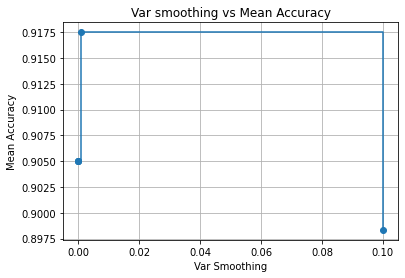

In [ ]:
fig, axis = plt.subplots()
axis.set_xlabel("Var Smoothing")
axis.set_ylabel("Mean Accuracy")
axis.set_title("Var smoothing vs Mean Accuracy")
axis.plot(var_smoothing, mean_accuracy_naivebayes, marker ='o' , label="train",drawstyle ="steps-post")
plt.grid()

In [ ]:
naive_clf_3 = GaussianNB(var_smoothing= 1e-3)


In [ ]:
naive_clf_3.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=0.001)

In [ ]:
y_naive3_predicted = naive_clf_3.predict(X_test)

In [ ]:
naiveB_3_accuracy = accuracy_score(y_test, y_naive3_predicted)
naiveB_3_accuracy

0.925

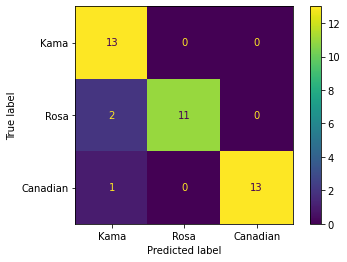

In [ ]:
plot_confusion_matrix(naive_clf_3,
                      X_test,
                      y_test,
                      display_labels=['Kama','Rosa','Canadian'])

#NORMALIZATION 

###Using standard scaler 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std



array([[-0.0126787 , -0.01877083,  0.41922706, ...,  0.17896048,
        -1.8353368 , -0.94549609],
       [-0.21474217, -0.38509103,  1.52681347, ...,  0.1895339 ,
        -0.6874603 , -1.21148031],
       [-0.36885838, -0.49956609,  1.08655946, ...,  0.30055481,
        -0.98791578, -1.25208859],
       ...,
       [-0.58804588, -0.71325287,  0.75289326, ..., -0.08801838,
         3.02086025, -0.74245469],
       [-1.05381932, -1.05667806, -0.92470625, ..., -1.13478697,
        -0.07357512, -0.76681966],
       [-0.8962783 , -0.95746634, -0.16932305, ..., -0.77000398,
         1.31876289, -0.7282418 ]])

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

X_Norm_train, X_Norm_test, y_Norm_train, y_Norm_test = train_test_split(X_std, y, 
                                                    test_size = 0.2,
                                                    random_state = 0)

###Use Decision Tree with Normalized Data

In [ ]:
Norm_dt_2 = DecisionTreeClassifier(random_state=0, max_depth=10)
Norm_dt_2 = Norm_dt_2.fit(X_Norm_train, y_Norm_train)

In [ ]:
Norm_dt_predicted = Norm_dt_2. predict(X_Norm_test)

In [ ]:
Norm_dt_accuracy = accuracy_score(y_Norm_test, Norm_dt_predicted)
Norm_dt_accuracy

0.9

###Use Random Forest with Normalized Data

In [ ]:
Norm_rft_2 =  RandomForestClassifier(max_depth=5, n_estimators=10)

In [ ]:
Norm_rft_2.fit(X_Norm_train, y_Norm_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
Norm_rft_predicted = Norm_rft_2. predict(X_Norm_test)

In [ ]:
Norm_rft_accuracy = accuracy_score(y_Norm_test, Norm_rft_predicted)
Norm_rft_accuracy

0.9

###Use Gradient Boosting with Normalized Data

In [ ]:
Norm_gradient_2 =  GradientBoostingClassifier(n_estimators=150)

In [ ]:
Norm_gradient_2.fit(X_Norm_train, y_Norm_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
Norm_gradient_predicted =  Norm_gradient_2.predict(X_Norm_test)

In [ ]:
Norm_gradient_accuracy = accuracy_score(y_Norm_test, Norm_gradient_predicted)
Norm_gradient_accuracy

0.975